# 1.Import and Install Dependencies


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp

#  2. KeyPoints using MP Holistic


In [2]:
mp_holistic = mp.solutions.holistic #Holistic Model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False                 #Image is no longer writeable
    results = model.process(image)                #Make predicition
    image.flags.writeable = True                  #Image is not writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)  #color conversion
    return image,results

In [4]:
def draw_landmarks(image,result):
    #Draw face connetcions
    #Draw Pose Connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    #Draw left hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    #Draw right hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image,results):
    #Draw face connetcions
    #Draw Pose Connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    #Draw left hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2))
    #Draw right hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))

In [6]:
cap = cv2.VideoCapture(0)
#Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed from the cam (frames)
        ret,frame = cap.read()

        #Make detections
        image,results = mediapipe_detection(frame,holistic)
        print(results)

        #Draw Landmarks
        
        draw_styled_landmarks(image,results)
        #Show to Screen
        cv2.imshow('OpenCV Feed',image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame,results)

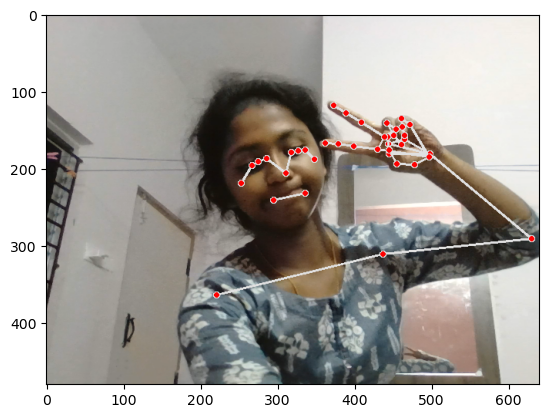

In [8]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

#  3.Extract KeyPoint Values


In [9]:
len(results.left_hand_landmarks.landmark)


21

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [11]:
#Extract pose keypoints
pose = np.array([[res.x,res.y,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)

#Extract face landmarks
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

#Extract left hand keypoints
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
#Extract right hand keypoints
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test

array([ 4.86041844e-01,  4.29914087e-01, -6.91913903e-01,  9.99896407e-01,
        4.96979326e-01,  3.73463005e-01, -6.12354875e-01,  9.99842167e-01,
        5.12219965e-01,  3.69784534e-01, -6.12110734e-01,  9.99862254e-01,
        5.25815129e-01,  3.67061764e-01, -6.11816525e-01,  9.99846697e-01,
        4.47737992e-01,  3.91574949e-01, -6.43286467e-01,  9.99829948e-01,
        4.31089550e-01,  3.99998963e-01, -6.42938375e-01,  9.99845088e-01,
        4.18564707e-01,  4.08415198e-01, -6.43055558e-01,  9.99813855e-01,
        5.43896139e-01,  3.92321140e-01, -2.10954815e-01,  9.99877036e-01,
        3.95516902e-01,  4.57972348e-01, -3.35692823e-01,  9.99887884e-01,
        5.25450885e-01,  4.83409464e-01, -5.50602198e-01,  9.99847651e-01,
        4.62246090e-01,  5.03081143e-01, -5.85021019e-01,  9.99829590e-01,
        6.84045911e-01,  6.48699045e-01, -2.08510133e-03,  9.99224603e-01,
        3.46224308e-01,  7.60344744e-01, -3.24312925e-01,  9.95157778e-01,
        9.84394729e-01,  

In [15]:
468*10 + 21*10 + 21 *10 + 33*10

5430

In [16]:
np.save('0',result_test)

In [17]:
np.load('0.npy')

array([ 4.86041844e-01,  4.29914087e-01, -6.91913903e-01,  9.99896407e-01,
        4.96979326e-01,  3.73463005e-01, -6.12354875e-01,  9.99842167e-01,
        5.12219965e-01,  3.69784534e-01, -6.12110734e-01,  9.99862254e-01,
        5.25815129e-01,  3.67061764e-01, -6.11816525e-01,  9.99846697e-01,
        4.47737992e-01,  3.91574949e-01, -6.43286467e-01,  9.99829948e-01,
        4.31089550e-01,  3.99998963e-01, -6.42938375e-01,  9.99845088e-01,
        4.18564707e-01,  4.08415198e-01, -6.43055558e-01,  9.99813855e-01,
        5.43896139e-01,  3.92321140e-01, -2.10954815e-01,  9.99877036e-01,
        3.95516902e-01,  4.57972348e-01, -3.35692823e-01,  9.99887884e-01,
        5.25450885e-01,  4.83409464e-01, -5.50602198e-01,  9.99847651e-01,
        4.62246090e-01,  5.03081143e-01, -5.85021019e-01,  9.99829590e-01,
        6.84045911e-01,  6.48699045e-01, -2.08510133e-03,  9.99224603e-01,
        3.46224308e-01,  7.60344744e-01, -3.24312925e-01,  9.95157778e-01,
        9.84394729e-01,  

# 4.Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Actions that we try detect
actions = np.array(['hello','thanks','I love you','please','Yes','No','help','baby','Emergency','later'])

#Thirty videos worth of data 
no_sequences = 30

 #Videos are going to be 30 frames in length
sequences_length = 30

In [19]:
#hello
## 0
## 1
## 2
## ...
# 29
#thanks

#I love you

In [8]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [22]:
cap = cv2.VideoCapture(0)
#Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5,min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            
            #loop through video length aka sequence length
            for frame_num in range(sequences_length):
                
                #read feed from the cam (frames)
                ret,frame = cap.read()

                #Make detections
                image,results = mediapipe_detection(frame,holistic)
                #print(results)

                #Draw Landmarks

                draw_styled_landmarks(image,results)
                
                #New Apply collection logic
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {}  Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed',image)
                    cv2.waitKey(2000)
                    
                else:
                    cv2.putText(image,'Collecting frames for {}  Video Number {} '.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed',image)
                    
                #New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [23]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and create Labels and Features

In [9]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num,label in enumerate(actions)}

In [11]:
label_map

{'hello': 0,
 'thanks': 1,
 'I love you': 2,
 'please': 3,
 'Yes': 4,
 'No': 5,
 'help': 6,
 'baby': 7,
 'Emergency': 8,
 'later': 9}

In [12]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequences_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [14]:
np.array(sequences).shape

(300, 30, 258)

In [15]:
np.array(labels).shape

(300,)

In [16]:
x = np.array(sequences)

In [17]:
x.shape

(300, 30, 258)

In [18]:
y = to_categorical(labels).astype(int)

In [19]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [20]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% training, 20% temp (for validation/test)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)  # Split the remaining 20% into validation and test


In [38]:
x_train.shape

(240, 30, 258)

In [39]:
x_test.shape

(30, 30, 258)

In [40]:
y_train.shape

(240, 10)

In [41]:
y_test.shape

(30, 10)

In [5]:
import numpy as np
print(np.__version__)


2.0.2


# 7. Build and Train LSTM Neural Network

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import regularizers

In [22]:

# Model Architecture
model = Sequential()

# First LSTM layer
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30, 258),
               kernel_regularizer=regularizers.l2(0.001)))  # Added L2 regularization
model.add(BatchNormalization())
model.add(Dropout(0.4))  # Slightly increased dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(256, return_sequences=True, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Third LSTM layer
model.add(LSTM(128, return_sequences=False, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\HP\anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
x.shape

NameError: name 'x' is not defined

In [85]:
actions.shape[0]

10

In [86]:
res = [.7,.2,.1]
np.argmax(res)


0

In [87]:
actions[np.argmax(res)]

'hello'

In [88]:
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 30:
        return 0.0005
    else:
        return 0.0001

In [89]:
lr_scheduler = LearningRateScheduler(lr_schedule)


In [90]:
model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics = ['categorical_accuracy'])

In [91]:
checkpoint = ModelCheckpoint('best_model_copy.keras', monitor='val_loss', save_best_only=True, mode='min')


In [92]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=32, validation_data=(x_val, y_val),
                    callbacks=[lr_scheduler, checkpoint])

Epoch 1/2000
8/8 [==============================] - 5s 145ms/step - loss: 3.2449 - categorical_accuracy: 0.2583 - val_loss: 3.0821 - val_categorical_accuracy: 0.1333 - lr: 0.0010
Epoch 2/2000
8/8 [==============================] - 1s 72ms/step - loss: 2.8012 - categorical_accuracy: 0.3417 - val_loss: 3.2462 - val_categorical_accuracy: 0.3000 - lr: 0.0010
Epoch 3/2000
8/8 [==============================] - 1s 71ms/step - loss: 3.0497 - categorical_accuracy: 0.2917 - val_loss: 3.7585 - val_categorical_accuracy: 0.0667 - lr: 0.0010
Epoch 4/2000
8/8 [==============================] - 1s 80ms/step - loss: 2.9728 - categorical_accuracy: 0.2875 - val_loss: 6.5676 - val_categorical_accuracy: 0.1667 - lr: 0.0010
Epoch 5/2000
8/8 [==============================] - 1s 74ms/step - loss: 3.2166 - categorical_accuracy: 0.2042 - val_loss: 3.5081 - val_categorical_accuracy: 0.1667 - lr: 0.0010
Epoch 6/2000
8/8 [==============================] - 1s 69ms/step - loss: 3.1107 - categorical_accuracy: 0.245

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 128)           198144    
                                                                 
 batch_normalization_8 (Bat  (None, 30, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 30, 256)           394240    
                                                                 
 batch_normalization_9 (Bat  (None, 30, 256)           1024      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 30, 256)          

# 8.Make Predictions


In [94]:
res = model.predict(x_test)

1/1 [==============================] - 0s 417ms/step


In [95]:
np.sum(res[0])

0.99999994

In [96]:
actions[np.argmax(res[1])]

'baby'

In [97]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Heading

In [98]:
model.save('action_copy.h5')

c:\Users\HP\anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model.load_weights('action_copy.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [24]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [25]:
yhat = model.predict(x_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [26]:
ytrue = np.argmax(y_train,axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [27]:
print(yhat,ytrue)

[7, 1, 0, 6, 5, 1, 0, 1, 1, 6, 3, 4, 7, 6, 4, 1, 2, 2, 2, 9, 5, 5, 0, 4, 2, 3, 3, 2, 0, 0, 6, 3, 2, 7, 1, 0, 5, 4, 9, 2, 7, 2, 1, 6, 1, 7, 4, 0, 6, 3, 4, 1, 2, 8, 1, 3, 4, 1, 6, 6, 1, 5, 6, 5, 4, 1, 1, 4, 6, 1, 4, 3, 5, 3, 1, 1, 5, 5, 5, 0, 3, 4, 5, 4, 7, 1, 4, 2, 0, 2, 1, 3, 7, 5, 1, 8, 7, 2, 6, 2, 7, 5, 0, 1, 0, 4, 1, 1, 5, 1, 3, 6, 8, 1, 2, 8, 4, 0, 9, 4, 6, 0, 1, 1, 3, 1, 8, 5, 3, 1, 2, 5, 7, 6, 8, 0, 1, 1, 0, 7, 0, 4, 1, 6, 5, 6, 1, 4, 2, 4, 4, 1, 0, 2, 1, 2, 1, 1, 5, 1, 4, 1, 7, 5, 0, 1, 3, 2, 6, 7, 1, 8, 1, 1, 6, 0, 1, 3, 1, 7, 1, 6, 5, 1, 7, 4, 6, 7, 8, 0, 3, 1, 4, 0, 4, 3, 1, 2, 6, 1, 3, 1, 8, 0, 2, 5, 1, 4, 9, 1, 1, 1, 5, 6, 9, 6, 5, 1, 1, 7, 8, 0, 5, 9, 6, 1, 4, 4, 5, 3, 2, 7, 4, 9, 0, 6, 2, 3, 1, 3] [7, 1, 0, 6, 5, 1, 0, 8, 1, 6, 3, 4, 7, 6, 4, 9, 2, 2, 2, 9, 5, 5, 0, 4, 2, 3, 3, 2, 0, 0, 6, 3, 2, 7, 1, 0, 5, 4, 9, 2, 7, 2, 1, 6, 8, 7, 4, 0, 6, 3, 4, 8, 2, 8, 8, 3, 4, 9, 6, 6, 1, 5, 6, 5, 4, 8, 1, 4, 6, 9, 4, 3, 5, 3, 9, 9, 5, 5, 5, 0, 3, 4, 5, 4, 7, 8, 4, 2, 0, 2, 8, 3, 7,

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Test Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8
           9       1.00      0.50      0.67         2

    accuracy                           0.93        30
   macro avg       0.94      0.88      0.88        30
weighted avg       0.95      0.93      0.93        30



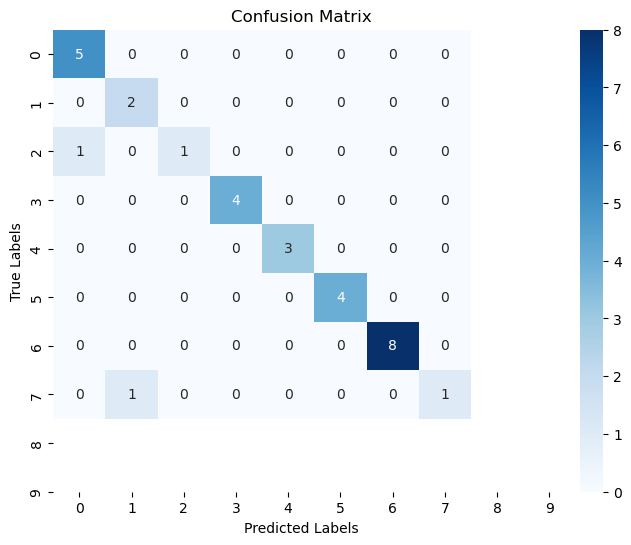

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def evaluate_and_visualize(model, x_test, y_test):
    # Predict classes for test data
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Classification report for precision, recall, F1-score
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(y_test.shape[1]), yticklabels=range(y_test.shape[1]))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming `model` is your trained model
evaluate_and_visualize(model, x_test, y_test)


In [28]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[216,   0],
        [  0,  24]],

       [[181,  34],
        [  0,  25]],

       [[217,   0],
        [  0,  23]],

       [[219,   0],
        [  0,  21]],

       [[212,   0],
        [  0,  28]],

       [[215,   0],
        [  0,  25]],

       [[215,   0],
        [  0,  25]],

       [[222,   0],
        [  0,  18]],

       [[213,   0],
        [ 17,  10]],

       [[216,   0],
        [ 17,   7]]], dtype=int64)

In [29]:
accuracy_score(ytrue,yhat)

0.8583333333333333

# 11. Test in Real Time

In [12]:
colors = [(245,117,16),(117,245,16),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        color = colors[num % len(colors)]
        cv2.rectangle(output_frame, (0, 60 + num*40), (int(prob*100), 90 + num*40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num*40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

    

In [25]:
# New detection variables
sequence = []
sentence = []
threshold = 0.95  # Increased threshold for detecting actions
action_started = False  # Flag to check if action has started

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Check if all required landmarks are detected only at the start
        if not action_started:
            if results.face_landmarks and results.left_hand_landmarks and results.right_hand_landmarks:
                action_started = True  # Set the flag to true when landmarks are detected

        # 2. Prediction logic
        if action_started:  # Only proceed if action has started
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]

            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])

                # 3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5: 
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
cap.release()
cv2.destroyAllWindows()

In [26]:
print(sentence)

['please', 'No', 'Yes', 'No', 'baby']


In [15]:
res[np.argmax(res)] > threshold

True

In [27]:
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer

nltk.download('punkt')


def actions_to_sentence(detected_actions):
    sentence = []
    
    if 'hello' in detected_actions:
        sentence.append('Hello!')
    
    if 'I love you' in detected_actions:
        sentence.append('I love you!')
    
    if 'thanks' in detected_actions:
        sentence.append('Thank you!')
    
    if 'help' in detected_actions:
        sentence.append('I need help!')
    
    if 'Emergency' in detected_actions:
        sentence.append('There is an emergency!')
    
    if 'later' in detected_actions:
        sentence.append('See you later!')

    if 'Yes' in detected_actions:
        sentence.append('Yes, that’s correct.')
    
    if 'No' in detected_actions:
        sentence.append('No, that’s not right.')
    
    if 'please' in detected_actions:
        sentence.append('Please, could you assist me?')

    if 'baby' in detected_actions:
        sentence.append('There’s a baby.')

    return sentence

detected_actions = ['hello', 'I love you', 'thanks', 'help', 'Emergency']
final_sentence = actions_to_sentence(sentence)


final_sentence_text = ' '.join(final_sentence)


print("Generated Sentence:", final_sentence_text)


Generated Sentence: Yes, that’s correct. No, that’s not right. Please, could you assist me? There’s a baby.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
from googletrans import Translator, LANGUAGES
def translate_text(text, target_language):
    translator = Translator()
    try:
        translated = translator.translate(text, dest=target_language)
        return translated.text
    except Exception as e:
        return None

# Display language options and take user input
def select_language():
    common_languages = {
        '1': 'hi',  # Hindi
        '2': 'te',  # Telugu
        '3': 'ta',  # Tamil
        '4': 'ml',  # Malayalam
        '5': 'kn',  # Kannada
        '6': 'es',  # Spanish
        '7': 'fr',  # French
        '8': 'de',  # German
        '9': 'zh-cn',  # Chinese (Simplified)
        '10': 'ja',  # Japanese
        '11': 'ko',  # Korean
        '12': 'it',  # Italian
        '13': 'ru',  # Russian
        '14': 'pt',  # Portuguese
        '15': 'ar',  # Arabic
        '16': 'bn',  # Bengali
        '17': 'pa',  # Punjabi
        '18': 'gu',  # Gujarati
        '19': 'mr',  # Marathi
        '20': 'other'  # Other option for custom input
    }

    print("Select a language to translate into:")
    for key, value in common_languages.items():
        print(f"{key}. {LANGUAGES[value].capitalize() if value != 'other' else 'Other'}")

    choice = input("Enter the number corresponding to your language choice: ")

    if choice == '20':  # 'Other' option
        custom_language = input("Please enter the language name: ").lower()
        # Find language code from `googletrans.LANGUAGES`
        
        for lang_code, lang_name in LANGUAGES.items():
            if lang_name == custom_language:
                return lang_code
        print("Sorry, the entered language is not available.")
        return None
    else:
        return common_languages.get(choice)


In [29]:
translate_choice = input("Do you want to translate the sentence? (y/n): ").lower()

if translate_choice == 'y':
    # Language selection
    target_language = select_language()

    if target_language:
        # Translate if language is valid
        translated_sentence = translate_text(final_sentence_text, target_language)
        if translated_sentence:
            print(f"Original Sentence: {final_sentence_text}")
            print(f"Translated Sentence ({LANGUAGES[target_language].capitalize()}): {translated_sentence}")
        else:
                print("Translation failed. Please try again.")
    else:
            print("No valid language selected.")
else:
    print(f"Original Sentence: {final_sentence_text}")

Select a language to translate into:
1. Hindi
2. Telugu
3. Tamil
4. Malayalam
5. Kannada
6. Spanish
7. French
8. German
9. Chinese (simplified)
10. Japanese
11. Korean
12. Italian
13. Russian
14. Portuguese
15. Arabic
16. Bengali
17. Punjabi
18. Gujarati
19. Marathi
20. Other
Original Sentence: Yes, that’s correct. No, that’s not right. Please, could you assist me? There’s a baby.
Translated Sentence (Tamil): ஆம், அது சரியானது.இல்லை, அது சரியல்ல.தயவுசெய்து, நீங்கள் எனக்கு உதவ முடியுமா?ஒரு குழந்தை இருக்கிறது.


In [30]:
import re
import pywhatkit  # For sending WhatsApp messages
from twilio.rest import Client  # For sending SMS

account_sid = 'AC91b775d11dd071b376477457f4175264'
auth_token = 'ac8cd707d40586229d1c56c46eb9eba5'
twilio_sms_number = '+12023359750' 
twilio_whatsapp_number = 'whatsapp:+14155238886'  


def validate_phone_number(phone_number):
    pattern = re.compile(r"^\+91\d{10}$")
    return bool(pattern.match(phone_number))

def send_message(method, phone_number, message):
    client = Client(account_sid, auth_token)
    
    if method.lower() == 'whatsapp':
        client.messages.create(body=message, from_=twilio_whatsapp_number, to=f'whatsapp:{phone_number}')
        print(f"Message sent via WhatsApp to {phone_number}")
    elif method.lower() == 'sms':
        client.messages.create(body=message, from_=twilio_sms_number, to=phone_number)
        print(f"Message sent via SMS to {phone_number}")
    else:
        print("Invalid method selected.")

def ask_to_send(message):
    send = input("Do you want to send this message? (yes/no): ").strip().lower()
    
    if send == 'yes':
        method = input("Send through SMS or WhatsApp? ").strip().lower()
        
        if method not in ['sms', 'whatsapp']:
            print("Please choose either SMS or WhatsApp.")
            return
        
        phone_number = input("Enter the phone number (e.g., +919876543210): ").strip()
        
        if validate_phone_number(phone_number):
            send_message(method, phone_number, message)
        else:
            print("Invalid phone number format. Please enter a valid Indian phone number.")
    else:
        print("Message not sent.")



In [30]:
print(translated_sentence)

హలో!నేను నిన్ను ప్రేమిస్తున్నాను!ధన్యవాదాలు!లేదు, అది సరైనది కాదు.


In [32]:
ask_to_send(translated_sentence)

Message sent via WhatsApp to +918019562956


In [64]:
np.expand_dims(x_test[0],axis=0).shape

(1, 30, 258)

In [65]:
res[np.argmax(res)]

0.9999691

In [66]:
np.argmax(res)

7

In [1]:
import tensorflow as tf
print(tf.__version__)


2.17.0
